<a href="https://colab.research.google.com/github/sammainahkinya1404/A-novel-detection-method-based-on-DETR-for-drone-aerial-images/blob/main/Advanced_Design_and_Analysis_of_the_Algorithm(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import math
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [40]:
# Function to calculate the Euclidean distance between two cities
def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

# Nearest neighbor TSP heuristic implementation
def nearest_neighbor_tsp(cities):
    n = len(cities)
    start_city = cities[0]
    visited = set()
    visited.add(start_city)
    tour = [start_city]
    current_city = start_city

    while len(visited) < n:
        nearest_city = None
        nearest_distance = float('inf')
        for city in cities:
            if city not in visited:
                distance = euclidean_distance(current_city, city)
                if distance < nearest_distance:
                    nearest_city = city
                    nearest_distance = distance
        tour.append(nearest_city)
        visited.add(nearest_city)
        current_city = nearest_city

    tour.append(start_city)  # return to the starting city
    return tour

In [41]:
# Function to calculate the total length of the tour
def calculate_tour_length(tour):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += euclidean_distance(tour[i], tour[i + 1])
    return total_distance

# Function to compute the exact TSP solution using brute force
def exact_tsp(cities):
    min_tour = None
    min_distance = float('inf')
    for permutation in itertools.permutations(cities[1:]):
        tour = [cities[0]] + list(permutation) + [cities[0]]
        distance = calculate_tour_length(tour)
        if distance < min_distance:
            min_distance = distance
            min_tour = tour
    return min_tour, min_distance

In [42]:
# Function to plot the tour using NetworkX
def plot_tour_networkx(cities, tour, title):
    G = nx.Graph()
    for i in range(len(tour) - 1):
        G.add_edge(tour[i], tour[i + 1], weight=euclidean_distance(tour[i], tour[i + 1]))
    pos = {city: city for city in cities}
    labels = {edge: f"{weight:.2f}" for edge, weight in nx.get_edge_attributes(G, 'weight').items()}

    plt.figure(figsize=(10, 5))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

Nearest Neighbor Tour: [(0, 0), (3, 0), (4, 3), (6, 1), (1, 3), (0, 0)]
Nearest Neighbor Distance: 17.538147252217453
Exact Tour: [(0, 0), (1, 3), (4, 3), (6, 1), (3, 0), (0, 0)]
Exact Distance: 15.15298244508295


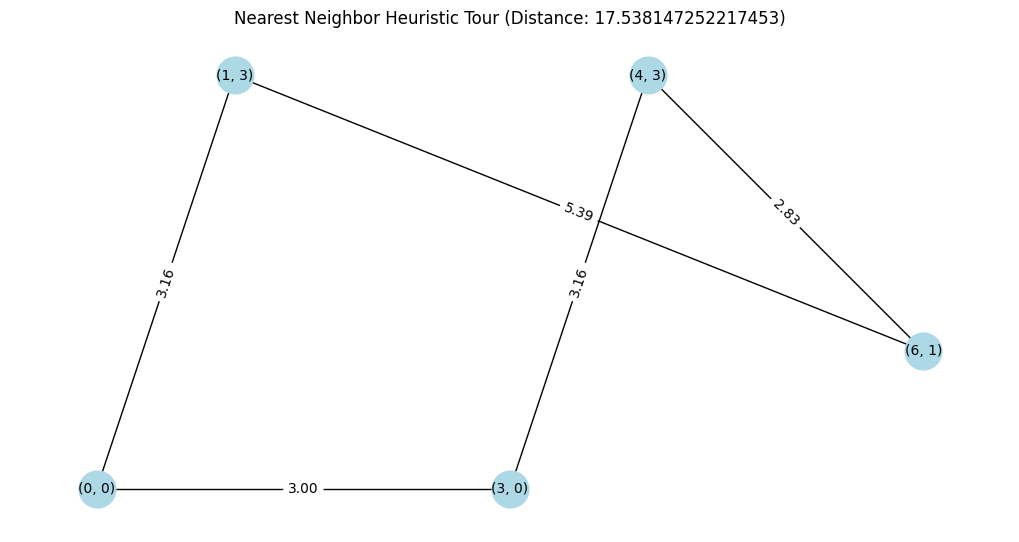

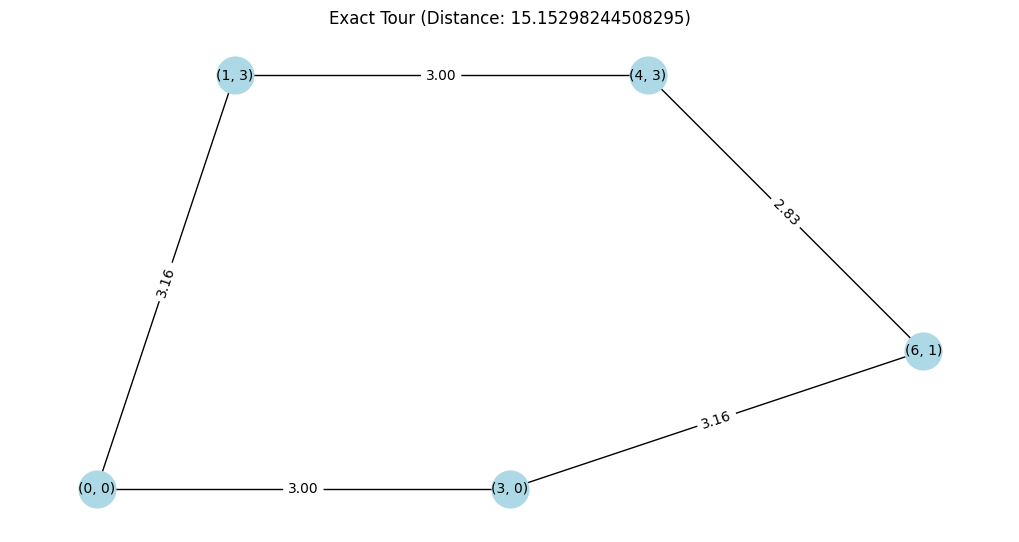

Approximation Ratio: 1.1574056338927836
          Algorithm                                              Tour  \
0  Nearest Neighbor  [(0, 0), (3, 0), (4, 3), (6, 1), (1, 3), (0, 0)]   
1             Exact  [(0, 0), (1, 3), (4, 3), (6, 1), (3, 0), (0, 0)]   

    Distance  
0  17.538147  
1  15.152982  


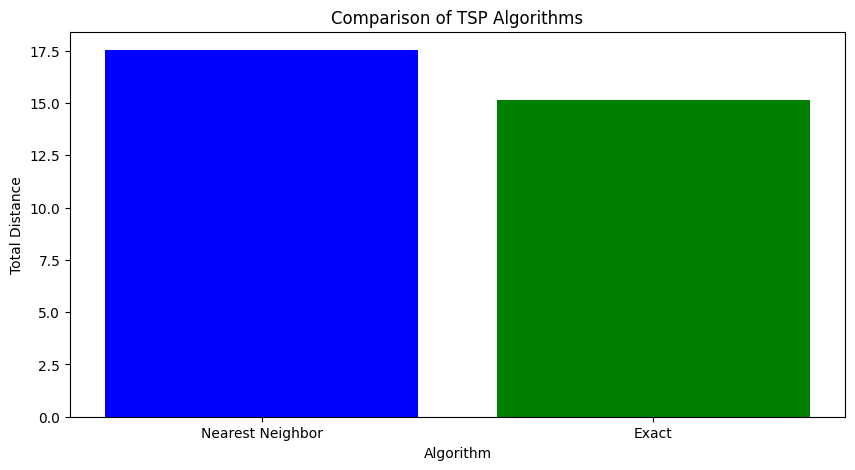

In [43]:
# Sample cities coordinates
cities = [(0, 0), (1, 3), (4, 3), (6, 1), (3, 0)]

# Nearest neighbor heuristic solution
nn_tour = nearest_neighbor_tsp(cities)
nn_distance = calculate_tour_length(nn_tour)
print("Nearest Neighbor Tour:", nn_tour)
print("Nearest Neighbor Distance:", nn_distance)

# Exact TSP solution for comparison
exact_tour, exact_distance = exact_tsp(cities)
print("Exact Tour:", exact_tour)
print("Exact Distance:", exact_distance)

# Plotting the tours
plot_tour_networkx(cities, nn_tour, f"Nearest Neighbor Heuristic Tour (Distance: {nn_distance})")
plot_tour_networkx(cities, exact_tour, f"Exact Tour (Distance: {exact_distance})")

# Calculating the approximation ratio
approximation_ratio = nn_distance / exact_distance
print("Approximation Ratio:", approximation_ratio)

# Creating a table to compare results
results = {
    "Algorithm": ["Nearest Neighbor", "Exact"],
    "Tour": [nn_tour, exact_tour],
    "Distance": [nn_distance, exact_distance]
}
df_results = pd.DataFrame(results)
print(df_results)

# Plotting the comparison
plt.figure(figsize=(10, 5))
plt.bar(df_results["Algorithm"], df_results["Distance"], color=['blue', 'green'])
plt.title('Comparison of TSP Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Total Distance')
plt.show()
